# Motivation

Fourier Transform will work very well when the **frequency spectrum is stationary.** That is, the frequencies present in the signal are not time-dependent; if a signal contains a frequency of x Hz this frequency should be present equally anywhere in the signal.


The more non-stationary/dynamic a signal is, the worse the results will be. That’s too bad, since most of the signals we see in real life are non-stationary in nature. Whether we are talking about ECG signals, the stock market, equipment or sensor data, etc, etc, in real life problems start to get interesting when we are dealing with dynamic systems. **A much better approach for analyzing dynamic signals is to use the Wavelet Transform instead of the Fourier Transform.**

## Wavelet Transform vs FT

The Fourier Transform uses a series of sine-waves with different frequencies to analyze a signal. That is, a signal is represented through a linear combination of sine-waves.

The Wavelet Transform uses a series of functions called **wavelets, each with a different scale.** The word wavelet means a small wave, and this is exactly what a wavelet is.

Fourier Transform has a very high resolution in the frequency domain, and zero resolution in the time domain; we know at which frequencies the signal oscillates, **but not at which time these oscillations occur.** The output of a Wavelet transform hash a high resolution in the frequency domain and also in the time domain; **it maintains information about the time-domain.**

The wavelet transform is better suited for analyzing signals with a dynamic frequency spectrum, i.e. the frequency spectrum changes over time, or has a component with a **different frequency localized in time** (the frequency changes abruptly for a short period of time).

![](http://ataspinar.com/wp-content/uploads/2018/07/Wavelet-Out1.jpg)

The difference between a sine-wave and a Wavelet. The sine-wave is **infinitely long and the Wavelet is localized in time.**

## Mechanism

Since the Wavelet is localized in time, we can multiply our signal with the wavelet at different locations in time. We start with the beginning of our signal and slowly move the wavelet towards the end of the signal. This procedure is also known as a **convolution.** After we have done this for the original (mother) wavelet, we can **scale it** such that it becomes larger and repeat the process. 

![](http://ataspinar.com/wp-content/uploads/2018/12/wavelet_convolution_3d_2d_final.gif)

for the scaleagram, y-axis is scale and x-axis is time

We can see that a **higher scale-factor (longer wavelet) corresponds with a smaller frequency**, so by scaling the wavelet in the time-domain we will analyze smaller frequencies (achieve a higher resolution) in the frequency domain. And vice versa, by using a **smaller scale we have more detail in the time-domain (more localised)**. So scales are basically the inverse of the frequency.

# Wavelet Families
The wavelet families differ from each other since for each family a different trade-off has been made in how compact and smooth the wavelet looks like. This means that we can choose a specific wavelet family which fits best with the features we are looking for in our signal.

Each type of wavelets has a different shape, smoothness and compactness and is **useful for a different purpose.**

In [35]:
import os
import pywt
#from wavelets.wave_python.waveletFunctions import *
import itertools
import numpy as np
import pandas as pd
from scipy.fftpack import fft
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

In [36]:
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

/home/jasonchandatascience/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


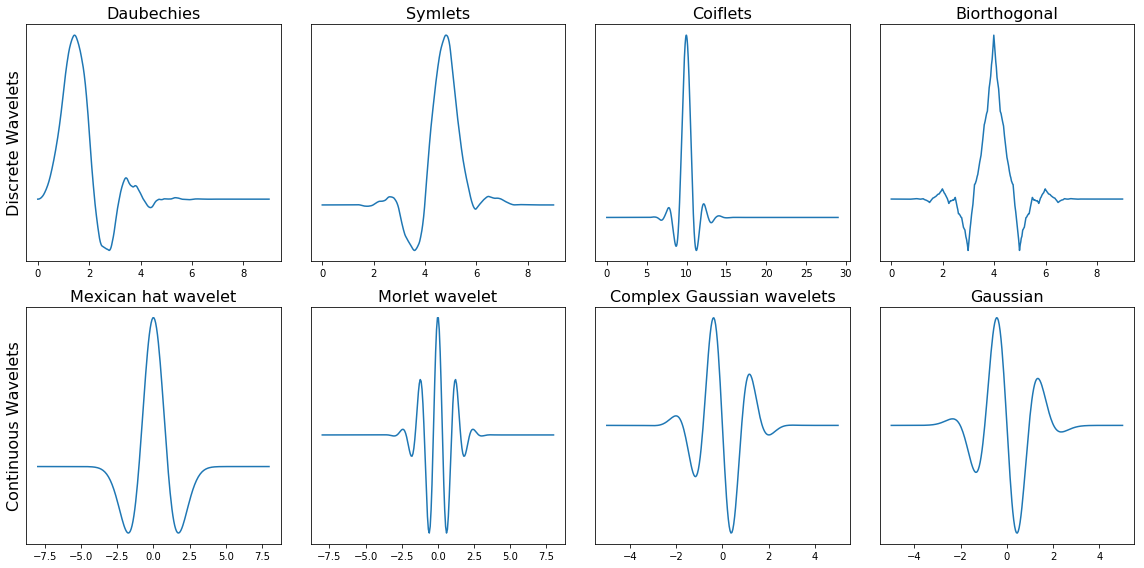

In [6]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

list_list_wavelets = [discrete_wavelets, continuous_wavelets]
list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
for ii, list_wavelets in enumerate(list_list_wavelets):
    func = list_funcs[ii]
    row_no = ii
    for col_no, waveletname in enumerate(list_wavelets):
        wavelet = func(waveletname)
        family_name = wavelet.family_name
        biorthogonal = wavelet.biorthogonal
        orthogonal = wavelet.orthogonal
        symmetry = wavelet.symmetry
        if ii == 0:
            _ = wavelet.wavefun()
            wavelet_function = _[0]
            x_values = _[-1]
        else:
            wavelet_function, x_values = wavelet.wavefun()
        if col_no == 0 and ii == 0:
            axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
        if col_no == 0 and ii == 1:
            axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
        axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
        axarr[row_no, col_no].plot(x_values, wavelet_function)
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])

plt.tight_layout()
plt.show()

## Breakdown by vanishing moments and level of decomposition

The number of vanishing moments is related to the approximation order and smoothness of the wavelet. If a wavelet has p vanishing moments, it can approximate polynomials of degree p – 1.

When selecting a wavelet, we can also indicate what the level of decomposition has to be. By default, PyWavelets chooses the maximum level of decomposition possible for the input signal. 

**The maximum level of decomposition (see pywt.dwt_max_level()) depends on the length of the input signal length and the wavelet (more on this later).**

As we can see, as the number of vanishing moments increases, the polynomial degree of the wavelet increases and it becomes smoother. **And as the level of decomposition increases, the number of samples this wavelet is expressed in increases.**

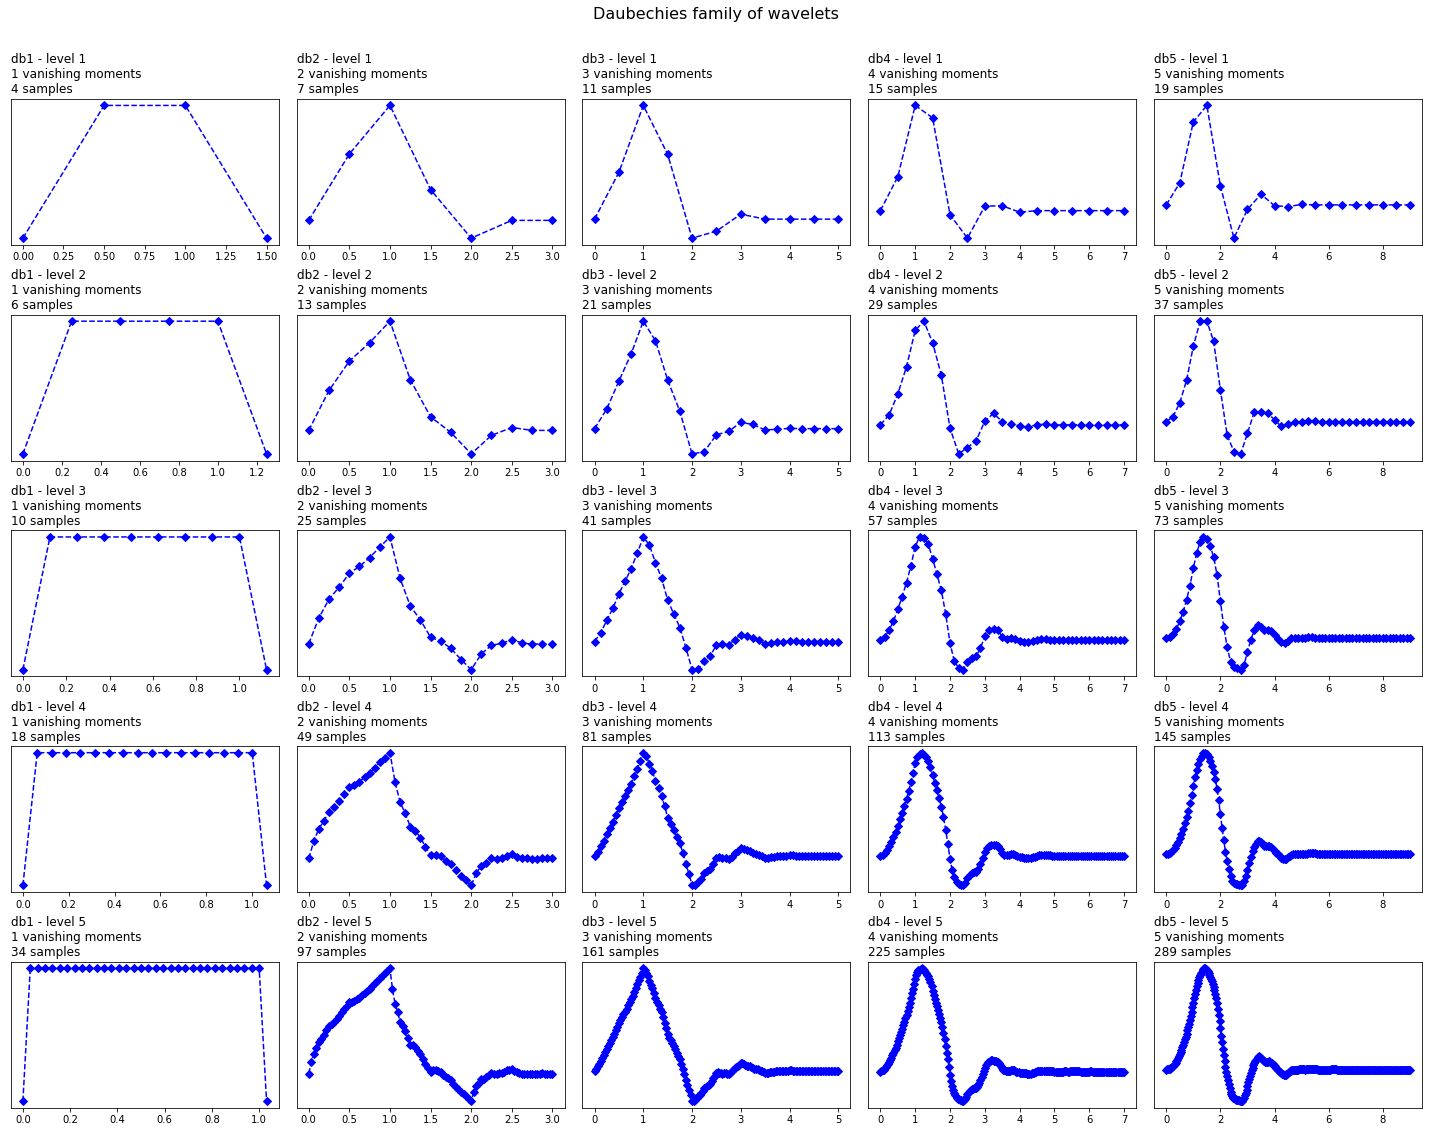

In [8]:
db_wavelets = pywt.wavelist('db')[:5]

fig, axarr = plt.subplots(ncols=5, nrows=5, figsize=(20,16))
fig.suptitle('Daubechies family of wavelets', fontsize=16)
for col_no, waveletname in enumerate(db_wavelets):
    wavelet = pywt.Wavelet(waveletname)
    no_moments = wavelet.vanishing_moments_psi
    family_name = wavelet.family_name
    for row_no, level in enumerate(range(1,6)):
        wavelet_function, scaling_function, x_values = wavelet.wavefun(level = level)
        axarr[row_no, col_no].set_title("{} - level {}\n{} vanishing moments\n{} samples".format(
            waveletname, level, no_moments, len(x_values)), loc='left')
        axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')
        axarr[row_no, col_no].set_yticks([])
        axarr[row_no, col_no].set_yticklabels([])
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# CWT vs DWT

The values of the scaling and translation factors are continuous, which means that there can be an infinite amount of wavelets. You can scale the mother wavelet with a factor of 1.3, or 1.31, and 1.311, and 1.3111 etc.

When we are talking about the Discrete Wavelet Transform, the main difference is that the DWT uses discrete values for the scale and translation factor. The scale factor increases in powers of two, so a = 1, 2, 4, .. and the translation factor increases integer values ( b = 1, 2, 3 .. ).

# DWT Filter Bank

To apply the DWT on a signal, we start with the smallest scale. As we have seen before, small scales correspond with high frequencies. This means that we first analyze high frequency behavior. At the second stage, the scale increases with a factor of two (the frequency decreases with a factor of two), and we are analyzing behavior around half of the maximum frequency. At the third stage, the scale factor is four and we are analyzing frequency behavior around a quarter of the maximum frequency. And this goes on and on, until we have reached the maximum decomposition level.



## DWT on Chirp Signal
A chirp signal is a signal with a dynamic frequency spectrum; **the frequency spectrum increases with time.** The start of the signal contains low frequency values and the end of the signal contains the high frequencies. This makes it easy for us to **visualize which part of the frequency spectrum is filtered out by simply looking at the time-axis.**

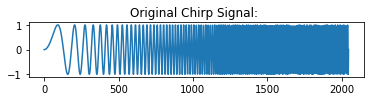

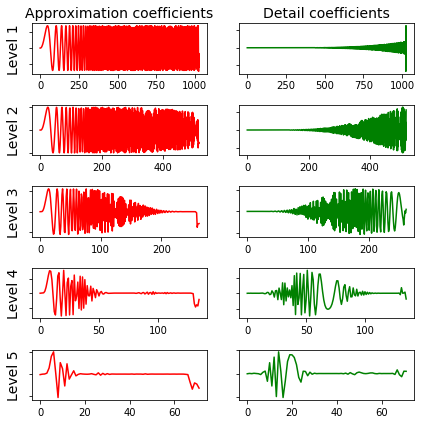

In [19]:
import numpy as np

x = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * x**2)
    
fig, ax = plt.subplots(figsize=(6,1))
ax.set_title("Original Chirp Signal: ")
ax.plot(chirp_signal)
plt.show()
    
data = chirp_signal
waveletname = 'sym5'

fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(6,6))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()

* The DWT return two sets of coefficients; the approximation coefficients and detail coefficients.
* The approximation coefficients represent the output of the low pass filter (averaging filter) of the DWT.
* The detail coefficients represent the output of the high pass filter (difference filter) of the DWT.
* By applying the DWT again on the approximation coefficients of the previous DWT, we get the wavelet transform of the next level.
* At each next level, the original signal is also sampled down by a factor of 2.
 

So now we have seen what it means that the DWT is implemented as a filter bank; At each subsequent level, the approximation coefficients are divided into a coarser low pass and high pass part and the DWT is applied again on the low-pass part

# CWT

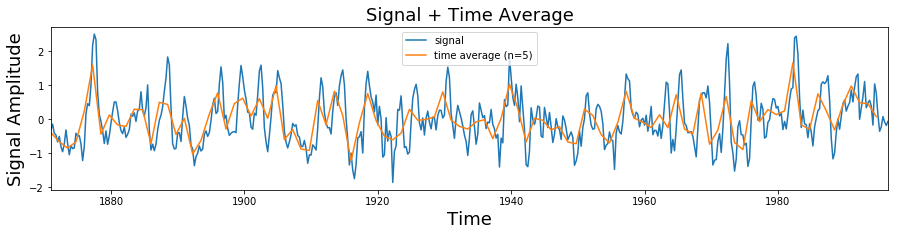

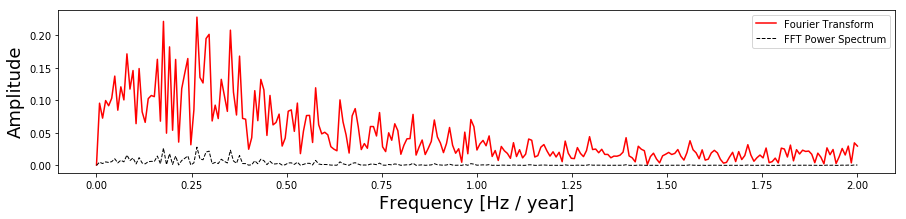

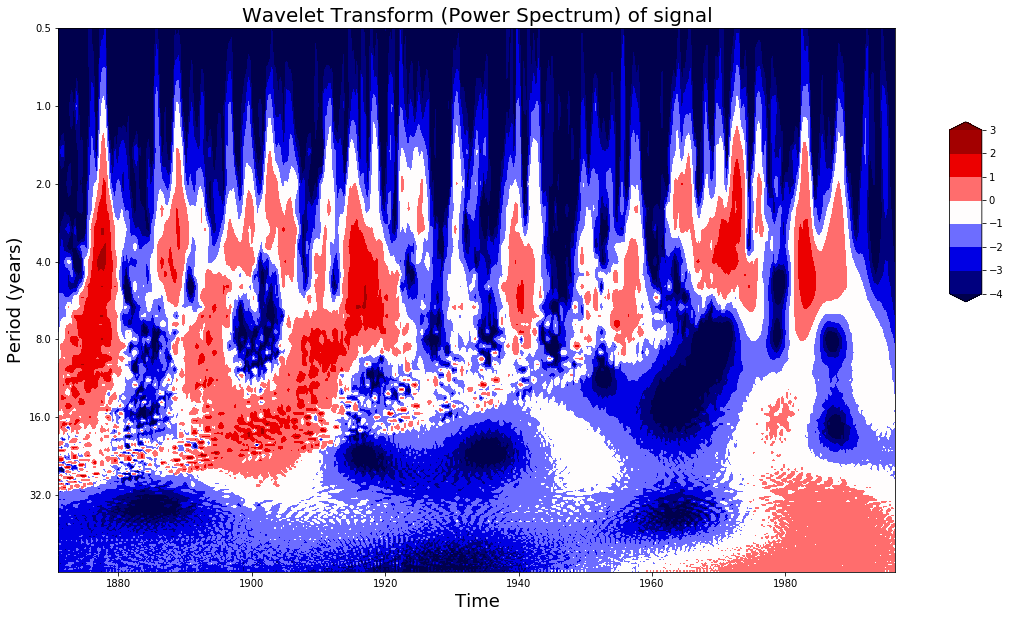

In [61]:
import pandas as pd

def get_ave_values(xvalues, yvalues, n = 5):
    signal_length = len(xvalues)
    if signal_length % n == 0:
        padding_length = 0
    else:
        padding_length = n - signal_length//n % n
    xarr = np.array(xvalues)
    yarr = np.array(yvalues)
    xarr.resize(signal_length//n, n)
    yarr.resize(signal_length//n, n)
    xarr_reshaped = xarr.reshape((-1,n))
    yarr_reshaped = yarr.reshape((-1,n))
    x_ave = xarr_reshaped[:,0]
    y_ave = np.nanmean(yarr_reshaped, axis=1)
    return x_ave, y_ave

def plot_wavelet(time, signal, scales, 
                 waveletname = 'cmor', 
                 cmap = plt.cm.seismic, 
                 title = 'Wavelet Transform (Power Spectrum) of signal', 
                 ylabel = 'Period (years)', 
                 xlabel = 'Time'):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    
    cbar_ax = fig.add_axes([0.95, 0.5, 0.03, 0.25])
    fig.colorbar(im, cax=cbar_ax, orientation="vertical")
    plt.show()

def plot_signal_plus_average(time, signal, average_over = 5):
    fig, ax = plt.subplots(figsize=(15, 3))
    time_ave, signal_ave = get_ave_values(time, signal, average_over)
    ax.plot(time, signal, label='signal')
    ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
    ax.set_xlim([time[0], time[-1]])
    ax.set_ylabel('Signal Amplitude', fontsize=18)
    ax.set_title('Signal + Time Average', fontsize=18)
    ax.set_xlabel('Time', fontsize=18)
    ax.legend()
    plt.show()
    
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values

def plot_fft_plus_power(time, signal):
    dt = time[1] - time[0]
    N = len(signal)
    fs = 1/dt
    
    fig, ax = plt.subplots(figsize=(15, 3))
    variance = np.std(signal)**2
    f_values, fft_values = get_fft_values(signal, dt, N, fs)
    fft_power = variance * abs(fft_values) ** 2     # FFT power spectrum
    ax.plot(f_values, fft_values, 'r-', label='Fourier Transform')
    ax.plot(f_values, fft_power, 'k--', linewidth=1, label='FFT Power Spectrum')
    ax.set_xlabel('Frequency [Hz / year]', fontsize=18)
    ax.set_ylabel('Amplitude', fontsize=18)
    ax.legend()
    plt.show()

dataset = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
df_nino = pd.read_table(dataset)
N = df_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = df_nino.values.squeeze()

scales = np.arange(1, 128)
plot_signal_plus_average(time, signal)
plot_fft_plus_power(time, signal)
plot_wavelet(time, signal, scales)

n the scaleogram we can see that most of the power is concentrated in a 2-8 year period. If we convert this to frequency (T = 1 / f) this corresponds with a frequency of 0.125 – 0.5 Hz. The increase in power can also be seen in the Fourier transform around these frequency values. The main difference is that the wavelet transform also gives us temporal information and the Fourier Transform does not. For example, in the scaleogram we can see that up to 1920 there were many fluctuations, while there were not so much between 1960 – 1990. We can also see that there is a shift from shorter to longer periods as time progresses. This is the kind of dynamic behavior in the signal which can be visualized with the Wavelet Transform but not with the Fourier Transform.

In [68]:
len(time)

503

In [ ]:
plt.axes.